In [6]:
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
import numpy as np

import os

In [7]:
def read_until_string(filename, stop_string="~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"):
    with open(filename, 'r') as file:
        text = file.read()
    
    # Extract text until the stop_string
    if stop_string in text:
        text = text.split(stop_string)[0]
    return text

def plot_histogram(text, file_name):
    # Remove spaces and newline characters, keep all other characters
    filtered_text = ''.join(c for c in text if c != ' ' and c != '\n')
    
    # Count the occurrences of each character
    counter = Counter(filtered_text)
    
    # Get all character frequencies in a consistent order
    all_chars = sorted(counter.keys())
    frequencies = [counter[char] for char in all_chars]
    
    # Get the 10 most common characters for plotting
    most_common = counter.most_common(10)
    print(most_common)
    plot_chars, plot_freqs = zip(*most_common)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(plot_chars, plot_freqs, color='skyblue')
    plt.xlabel('Character')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Characters in {file_name}')
    plt.show()
    
    # Return the complete frequency data
    return dict(zip(all_chars, frequencies))

def process_files_from_array(file_paths, stop_string="~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"):
    # Store histogram data for each file
    histogram_data = []
    # Keep track of all unique characters across all files
    all_chars = set()
    
    # First pass: collect all unique characters and histogram data
    for file_path in file_paths:
        print(f"Processing {file_path}...")
        text = read_until_string(file_path, stop_string)
        hist = plot_histogram(text, file_path)
        histogram_data.append(hist)
        all_chars.update(hist.keys())
    
    # Convert to a format suitable for ANOVA
    all_chars = sorted(all_chars)
    processed_histograms = []
    
    # Second pass: ensure each histogram has all characters (with 0 for missing ones)
    for hist in histogram_data:
        frequencies = [hist.get(char, 0) for char in all_chars]
        processed_histograms.append(frequencies)
    
    return processed_histograms, all_chars


Processing examples\uncropped_images\21\aiss.txt...
[('"', 176), (';', 104), ('~', 87), ('-', 85), ('>', 52), ('L', 39), ('q', 39), ('<', 38), ('*', 36), ('+', 34)]


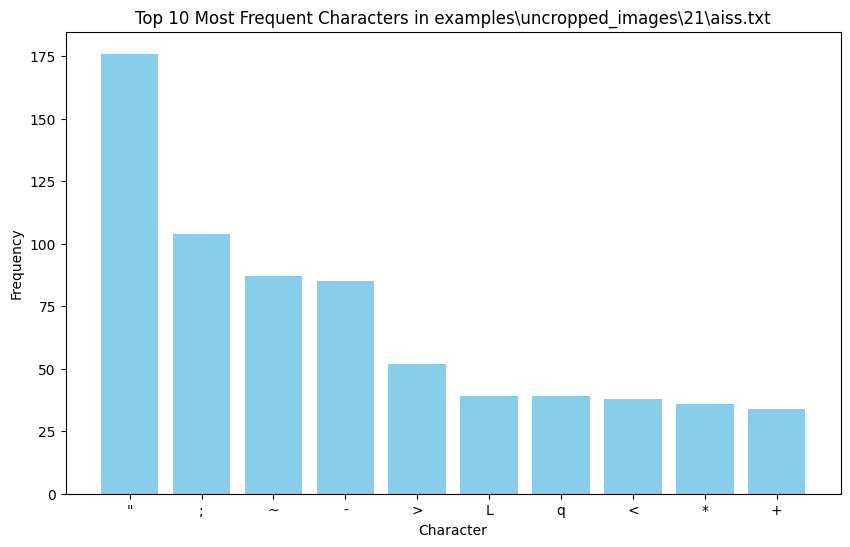

Processing examples\uncropped_images\21\nn.txt...
[('-', 725), ('^', 245), ('w', 239), ('\\', 111), (',', 109), ('`', 91), ('[', 84), ('=', 76), ('m', 63), ('F', 59)]


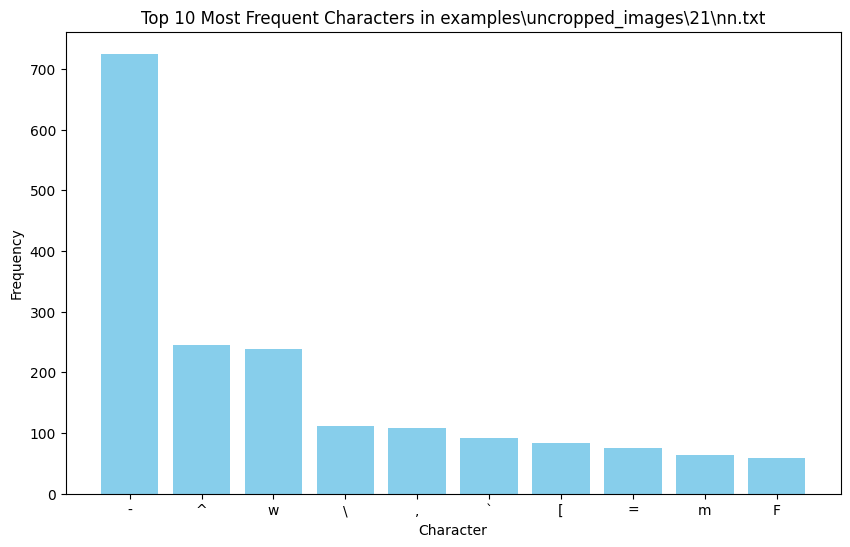

Processing examples\uncropped_images\21\knn.txt...
[('-', 381), ('.', 310), (',', 195), ('|', 179), ("'", 147), ('^', 92), (':', 59), ('`', 59), (']', 53), ('[', 48)]


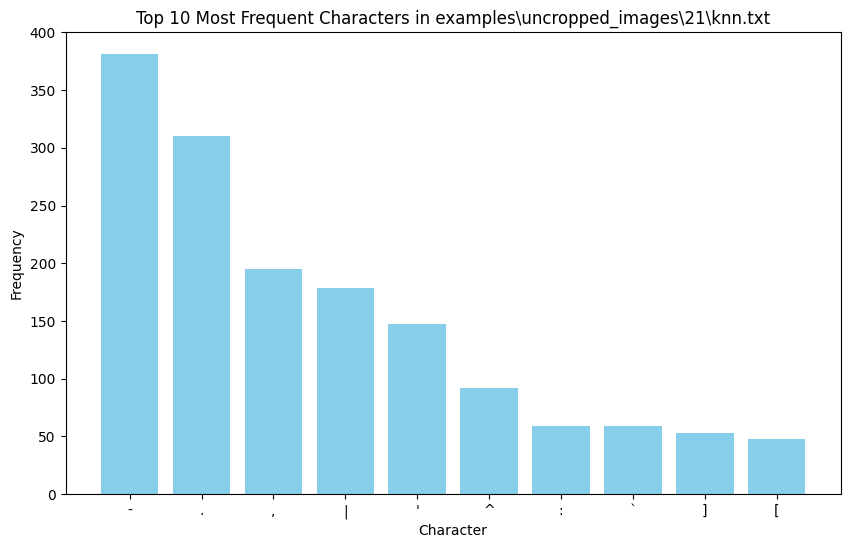

Processing examples\uncropped_images\21\svm.txt...
[('-', 324), ('.', 170), (',', 166), ('^', 128), ('[', 112), ('r', 111), (']', 106), ("'", 104), ('`', 90), ('x', 83)]


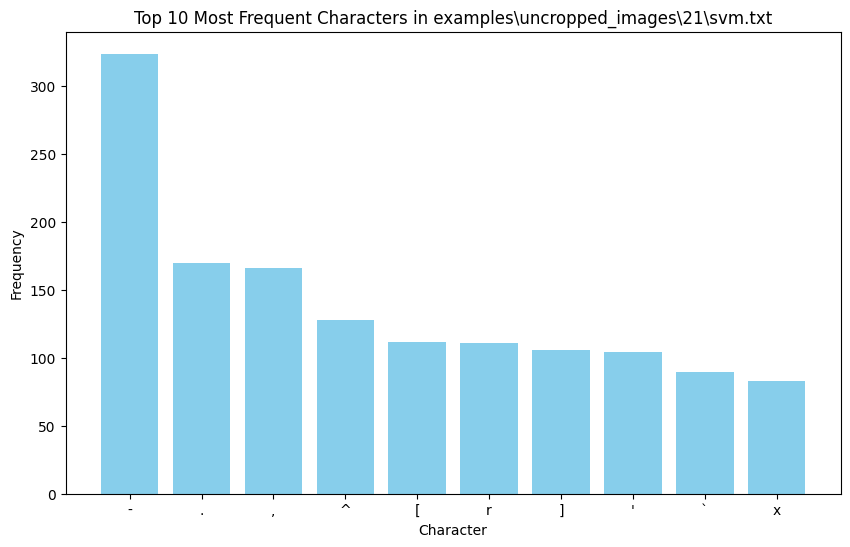

Processing examples\uncropped_images\21\rforest.txt...
[('.', 325), ('-', 307), (',', 256), ('|', 195), ("'", 192), ('`', 190), ('^', 98), ('~', 83), ('\\', 79), ('/', 75)]


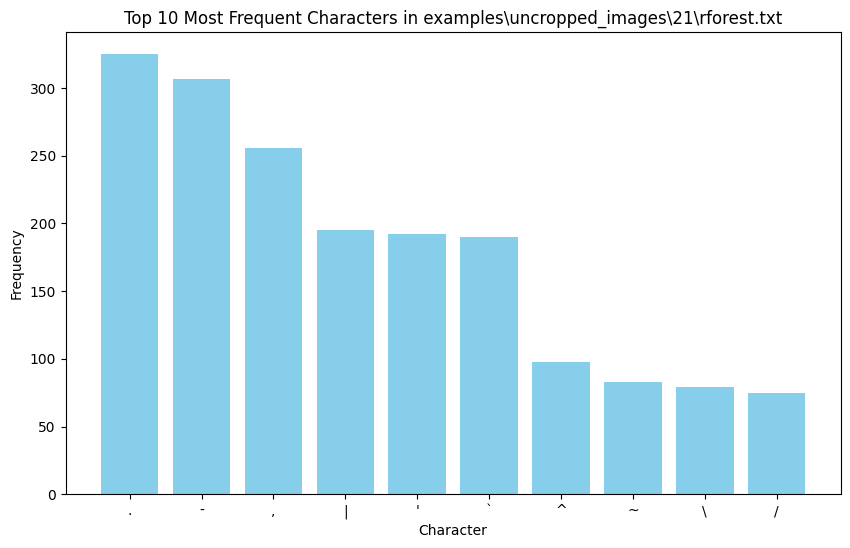

Processing examples\uncropped_images\21\knn_no_hog.txt...
[('-', 339), (',', 248), ('.', 179), ("'", 134), ('~', 123), ('`', 95), ('[', 85), ('^', 79), ('/', 73), ('\\', 70)]


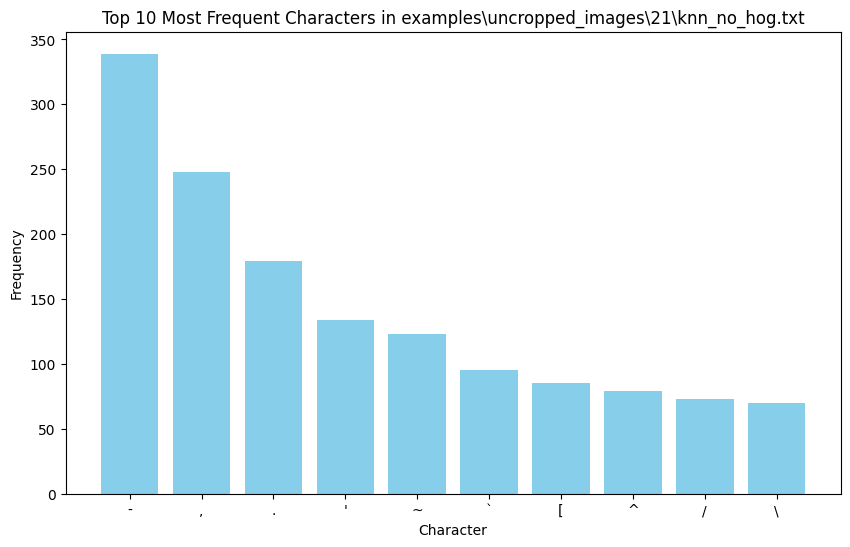

Processing examples\uncropped_images\21\svm_no_hog.txt...
[('^', 245), (';', 176), ('/', 144), ('+', 136), ('*', 90), (',', 80), ('\\', 74), ('`', 69), ('?', 67), ('Y', 54)]


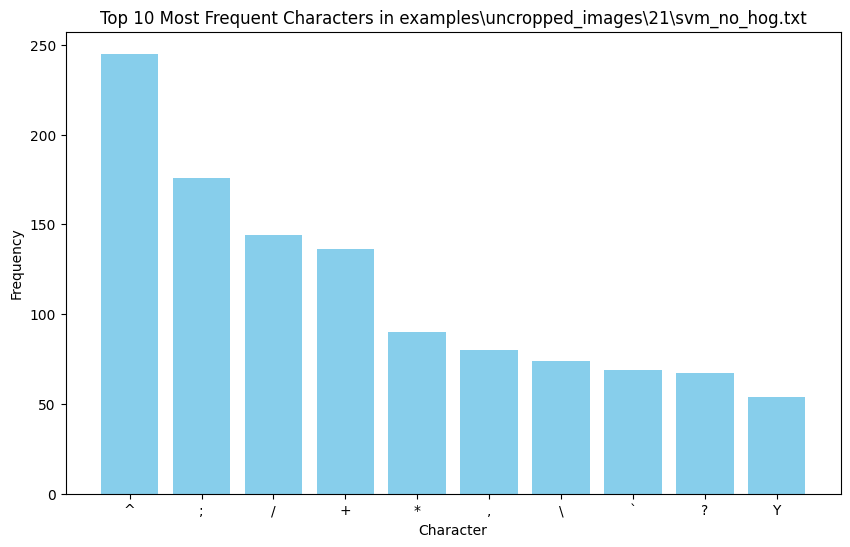

Processing examples\uncropped_images\21\rforest_no_hog.txt...
[(',', 311), ('-', 287), ('.', 238), ('`', 226), ("'", 193), ('/', 154), ('\\', 122), ('~', 90), ('[', 72), ('^', 54)]


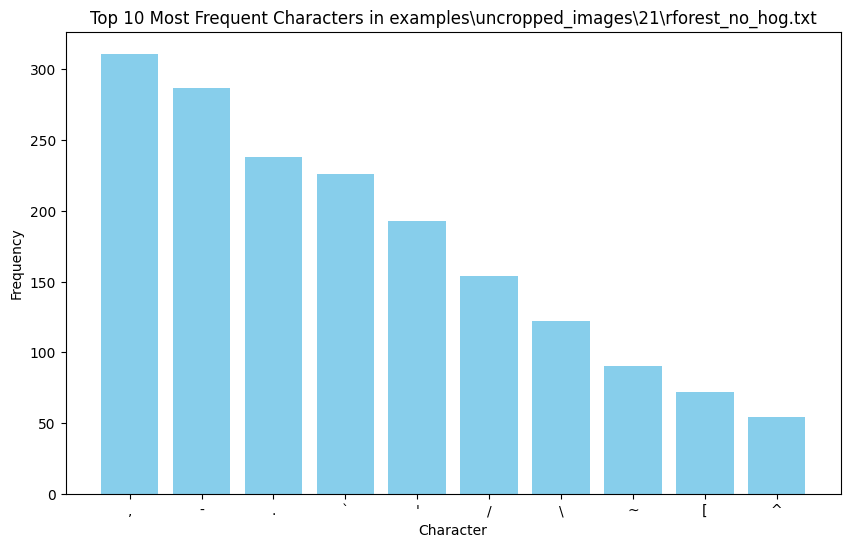

Processing examples\uncropped_images\21\cnn.txt...
[('-', 506), ('\\', 136), ('.', 118), (',', 110), ('[', 95), ('/', 76), ("'", 74), ('{', 73), ('`', 70), (']', 66)]


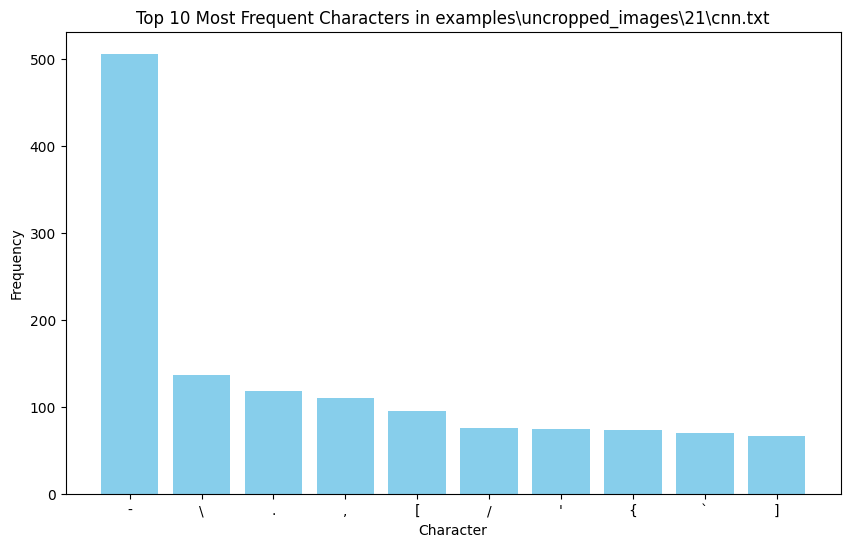

Processing examples\uncropped_images\21\resnet.txt...
[('-', 293), (']', 130), (',', 108), ('\\', 107), ('~', 102), ('[', 91), ('@', 88), ('?', 82), ('`', 77), ('7', 76)]


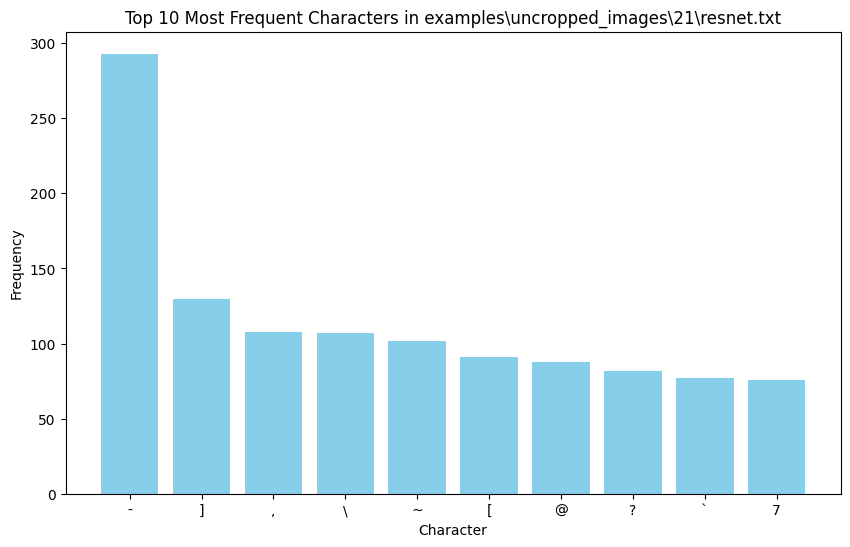

Processing examples\uncropped_images\21\mobile.txt...
[('.', 155), (',', 146), ('-', 143), ("'", 124), ('^', 116), ('?', 108), ('~', 106), ('/', 104), (';', 90), ('>', 86)]


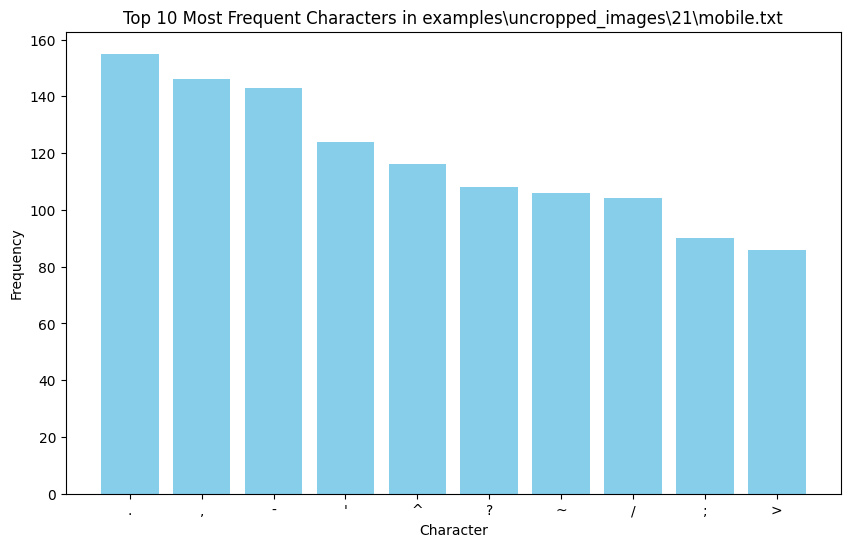

In [8]:
img_num = 21


image_filenames = [
    os.path.join('examples', 'uncropped_images', str(img_num), 'aiss.txt'),
    os.path.join('examples', 'uncropped_images', str(img_num), 'nn.txt'),
    os.path.join('examples', 'uncropped_images', str(img_num), 'knn.txt'),
    os.path.join('examples', 'uncropped_images', str(img_num), 'svm.txt'),
    os.path.join('examples', 'uncropped_images', str(img_num), 'rforest.txt'),
    os.path.join('examples', 'uncropped_images', str(img_num), 'knn_no_hog.txt'),
    os.path.join('examples', 'uncropped_images', str(img_num), 'svm_no_hog.txt'),
    os.path.join('examples', 'uncropped_images', str(img_num), 'rforest_no_hog.txt'),
    os.path.join('examples', 'uncropped_images', str(img_num), 'cnn.txt'),
    os.path.join('examples', 'uncropped_images', str(img_num), 'resnet.txt'),
    os.path.join('examples', 'uncropped_images', str(img_num), 'mobile.txt')
]

histograms, chars = process_files_from_array(image_filenames)

In [9]:
import csv

In [10]:
# Initialize a dictionary to store column sums and counts
column_sums = {}
column_counts = {}

# Open and read the CSV file
with open("i2v.csv", "r") as file:
    reader = csv.reader(file)
    headers = next(reader)  # Read the header row

    # Initialize the sums and counts for each column (excluding "Image Number")
    for header in headers[1:]:
        column_sums[header] = 0
        column_counts[header] = 0

    # Iterate through each row in the CSV
    for row in reader:
        for i, value in enumerate(row[1:], start=1):  # Skip the "Image Number" column
            column_sums[headers[i]] += float(value)
            column_counts[headers[i]] += 1

print("Column Sums:", column_sums)
print("Column Counts:", column_counts)
# Compute the averages for each column using a normal for loop
column_averages = {}
for header in headers[1:]:
    column_averages[header] = column_sums[header] / column_counts[header]

# Print the column sums, counts, and averages

print("Column Averages:")
for column, avg in column_averages.items():
    print(f"{column}: {avg*100:.2f}")


Column Sums: {'AISS': 12.221793930000002, 'Neural Network': 12.94180971, 'k-NN': 13.382246400000001, 'SVM': 13.56594818, 'Random Forest': 13.883896239999999, 'k-NN no HOG': 13.790084700000001, 'SVM no HOG': 13.21383426, 'Random Forest no HOG': 13.95351917, 'CNN': 13.844985990000001, 'ResNet': 13.2951003, 'MobileNetV2': 13.00729303, 'k-NN with AE': 12.614890889999998, 'AAConverter': 11.515049190000001}
Column Counts: {'AISS': 18, 'Neural Network': 18, 'k-NN': 18, 'SVM': 18, 'Random Forest': 18, 'k-NN no HOG': 18, 'SVM no HOG': 18, 'Random Forest no HOG': 18, 'CNN': 18, 'ResNet': 18, 'MobileNetV2': 18, 'k-NN with AE': 18, 'AAConverter': 18}
Column Averages:
AISS: 67.90
Neural Network: 71.90
k-NN: 74.35
SVM: 75.37
Random Forest: 77.13
k-NN no HOG: 76.61
SVM no HOG: 73.41
Random Forest no HOG: 77.52
CNN: 76.92
ResNet: 73.86
MobileNetV2: 72.26
k-NN with AE: 70.08
AAConverter: 63.97


In [11]:
# Initialize a dictionary to store column sums and counts
column_sums = {}
column_counts = {}

# Open and read the CSV file
with open("ssim_scores.csv", "r") as file:
    reader = csv.reader(file)
    headers = next(reader)  # Read the header row

    # Initialize the sums and counts for each column (excluding "Image Number")
    for header in headers[1:]:
        column_sums[header] = 0
        column_counts[header] = 0

    # Iterate through each row in the CSV
    for row in reader:
        for i, value in enumerate(row[1:], start=1):  # Skip the "Image Number" column
            column_sums[headers[i]] += float(value)
            column_counts[headers[i]] += 1

print("Column Sums:", column_sums)
print("Column Counts:", column_counts)
# Compute the averages for each column using a normal for loop
column_averages = {}
for header in headers[1:]:
    column_averages[header] = column_sums[header] / column_counts[header]

# Print the column sums, counts, and averages

print("Column Averages:")
for column, avg in column_averages.items():
    print(f"{column}: {avg:.4f}")


Column Sums: {'AISS': 12.695307449331182, 'Neural Network': 12.049467490640472, 'k-NN': 12.617569645576678, 'SVM': 12.271196033933757, 'Random Forest': 12.442213594258392, 'k-NN no HOG': 12.539166248410677, 'SVM no HOG': 12.285504433086718, 'Random Forest no HOG': 12.643350326448946, 'CNN': 12.611942411610764, 'ResNet': 12.09079062256514, 'MobileNetV2': 12.033140311499125, 'k-NN with AE': 12.379626940315674, 'AAConverter': 12.002653449952968}
Column Counts: {'AISS': 19, 'Neural Network': 19, 'k-NN': 19, 'SVM': 19, 'Random Forest': 19, 'k-NN no HOG': 19, 'SVM no HOG': 19, 'Random Forest no HOG': 19, 'CNN': 19, 'ResNet': 19, 'MobileNetV2': 19, 'k-NN with AE': 19, 'AAConverter': 19}
Column Averages:
AISS: 0.6682
Neural Network: 0.6342
k-NN: 0.6641
SVM: 0.6459
Random Forest: 0.6549
k-NN no HOG: 0.6600
SVM no HOG: 0.6466
Random Forest no HOG: 0.6654
CNN: 0.6638
ResNet: 0.6364
MobileNetV2: 0.6333
k-NN with AE: 0.6516
AAConverter: 0.6317


In [12]:
import pandas as pd
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'conversion_times.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Drop the 'Filename' column as it's not numeric
numeric_df = df.drop(columns=['Filename'])

# Calculate the average of each column
column_averages = numeric_df.mean()

# Print the results
print("Column Averages:")
print(column_averages)

Column Averages:
aiss              2.931365
nn                0.267675
rforest           1.095810
svm               9.468780
knn               1.291950
mobile            0.264135
resnet            0.289935
cnn               0.262300
knn_no_hog        0.264160
svm_no_hog        4.630175
rforest_no_hog    0.152705
knn_no_hog_ae     0.266510
dtype: float64
